In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind, f_oneway

In [40]:
# Load the dataset
data = pd.read_csv('data.csv')

C:\Users\Tigabu Abriham\AppData\Local\Temp\ipykernel_5788\3043090071.py:2: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data.csv')


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   underwrittencoverid       1000098 non-null  int64  
 1   policyid                  1000098 non-null  int64  
 2   transactionmonth          1000098 non-null  object 
 3   isvatregistered           1000098 non-null  bool   
 4   citizenship               1000098 non-null  object 
 5   legaltype                 1000098 non-null  object 
 6   title                     1000098 non-null  object 
 7   language                  1000098 non-null  object 
 8   bank                      854137 non-null   object 
 9   accounttype               959866 non-null   object 
 10  maritalstatus             991839 non-null   object 
 11  gender                    990562 non-null   object 
 12  country                   1000098 non-null  object 
 13  province                  1

In [42]:
# Drop rows with NaN values in 'totalclaims' column
data = data.dropna(subset=['totalclaims'])
# Convert 'totalclaims' column to numeric
data['totalclaims'] = pd.to_numeric(data['totalclaims'], errors='coerce')

In [43]:
# Check unique values in the CoverType column
unique_cover_types = data['covertype'].unique()
print("Unique Cover Types:", unique_cover_types)

# Count the occurrences of each cover type
cover_type_counts = data['covertype'].value_counts()
print("Cover Type Counts:")
print(cover_type_counts)

Unique Cover Types: ['Windscreen' 'Own Damage' 'Third Party' 'Passenger Liability'
 'Signage and Vehicle Wraps' 'Keys and Alarms'
 'Cleaning and Removal of Accident Debris' 'Emergency Charges'
 'Credit Protection' 'Roadside Assistance' 'Accidental Death'
 'Basic Excess Waiver' 'Income Protector' 'Deposit Cover'
 'Standalone passenger liability' 'Baggage/Luggage'
 'Asset Value Preserver' 'Cash Takings' 'Third Party Only' 'Trailer'
 'Fire and Theft' 'Factory Fitted Sound and Other Electronic Equipment']
Cover Type Counts:
covertype
Own Damage                                             104183
Passenger Liability                                    104158
Windscreen                                             103763
Third Party                                            102825
Keys and Alarms                                        102428
Signage and Vehicle Wraps                              102416
Emergency Charges                                      102416
Cleaning and Removal of Accide

In [44]:
# Data Segmentation based on chosen covertype values
control_group = data[data['covertype'] == 'Own Damage']
test_group = data[data['covertype'] == 'Third Party']

# Check the number of observations in each group
print("Control Group Size:", len(control_group))
print("Test Group Size:", len(test_group))

Control Group Size: 104183
Test Group Size: 102825


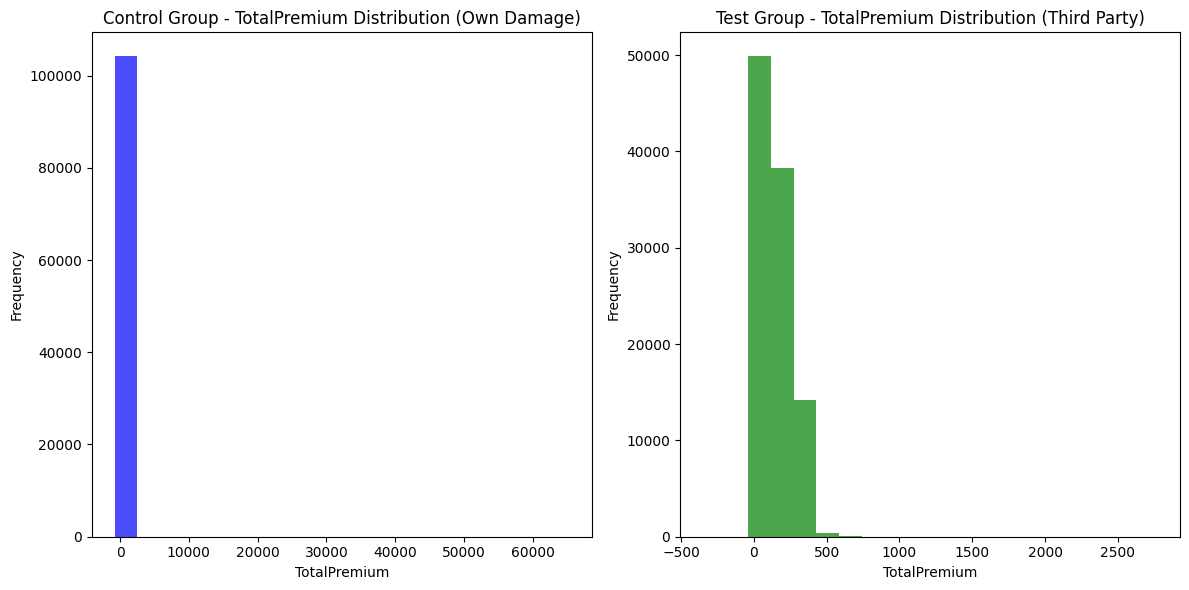

In [45]:
# let's visualize the distribution of 'TotalPremium' in the control and test groups
plt.figure(figsize=(12, 6))

# Histogram for the Control Group
plt.subplot(1, 2, 1)
plt.hist(control_group['totalpremium'], bins=20, color='blue', alpha=0.7)
plt.title('Control Group - TotalPremium Distribution (Own Damage)')
plt.xlabel('TotalPremium')
plt.ylabel('Frequency')

# Histogram for the Test Group
plt.subplot(1, 2, 2)
plt.hist(test_group['totalpremium'], bins=20, color='green', alpha=0.7)
plt.title('Test Group - TotalPremium Distribution (Third Party)')
plt.xlabel('TotalPremium')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [46]:
data['postalcode'].head()

0    1459
1    1459
2    1459
3    1459
4    1459
Name: postalcode, dtype: int64

In [47]:


# Assuming you have the necessary data loaded into these variables
zip_codes = data['postalcode'].unique()
risk_by_zipcode = data.groupby('postalcode')['totalclaims'].mean()

f_statistic_zip, p_value_zip = f_oneway(*[data[data['postalcode'] == zipcode]['totalclaims'] for zipcode in zip_codes])

print("Risk differences between zip codes:")
print(f"F-statistic: {f_statistic_zip},\n p-value: {p_value_zip}")

Risk differences between zip codes:
F-statistic: 0.9419762214391849,
 p-value: 0.8906511279164051


In [55]:
# Assuming you have the necessary data loaded into these variables
province_data = data.groupby('province')['totalclaims'].sum().reset_index()
province_data['totalclaims'] = pd.to_numeric(province_data['totalclaims'], errors='coerce')
zip_code_data_groupA = data[data['postalcode'] == 'A']['totalclaims']
zip_code_data_groupB = data[data['postalcode'] == 'B']['totalclaims']
# Assuming you have the necessary data loaded into these variables
gender_data = pd.crosstab(data['gender'], data['totalclaims'])

# Hypothesis 1: Risk differences across provinces
contingency_table = pd.crosstab(index=province_data['province'], columns=province_data['totalclaims'])

# Perform the chi-squared test using the contingency table
chi2_stat, p_value1, _, _ = chi2_contingency(contingency_table)

# Hypothesis 2: Risk differences between zip codes
t_stat, p_value2 = ttest_ind(zip_code_data_groupA, zip_code_data_groupB)

# Hypothesis 3: Margin (profit) difference between zip codes
profit_data_groupA = data[data['postalcode'] == 'zipcode_A']['totalpremium']
profit_data_groupB = data[data['postalcode'] == 'zipcode_B']['totalpremium']
t_stat, p_value3 = ttest_ind(profit_data_groupA, profit_data_groupB)

# Hypothesis 4: Risk difference between Women and Men
chi2_stat, p_value4, _, _ = chi2_contingency(gender_data)

# Interpretation of Results
if p_value1 < 0.05:
    print("Reject the null hypothesis for Risk differences across provinces.")
else:
    print("Fail to reject the null hypothesis for Risk differences across provinces.")

if p_value2 < 0.05:
    print("Reject the null hypothesis for Risk differences between zip codes.")
else:
    print("Fail to reject the null hypothesis for Risk differences between zip codes.")

if p_value3 < 0.05:
    print("Reject the null hypothesis for Margin (profit) difference between zip codes.")
else:
    print("Fail to reject the null hypothesis for Margin (profit) difference between zip codes.")

if p_value4 < 0.05:
    print("Reject the null hypothesis for Risk difference between Women and Men.")
else:
    print("Fail to reject the null hypothesis for Risk difference between Women and Men.")

Fail to reject the null hypothesis for Risk differences across provinces.
Fail to reject the null hypothesis for Risk differences between zip codes.
Fail to reject the null hypothesis for Margin (profit) difference between zip codes.
Fail to reject the null hypothesis for Risk difference between Women and Men.


C:\Users\Tigabu Abriham\AppData\Local\Temp\ipykernel_5788\1119639176.py:16: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_value2 = ttest_ind(zip_code_data_groupA, zip_code_data_groupB)
C:\Users\Tigabu Abriham\AppData\Local\Temp\ipykernel_5788\1119639176.py:21: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_value3 = ttest_ind(profit_data_groupA, profit_data_groupB)
